# Clustering for gevsimbad

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [4]:
#name columns included in the final display
other_names = ['s_MAIN_ID', 's_class', 'gev_1FGL_Name', 'gev_CLASS1', 'marked']
#from gamma bins directory
path_to_catalog = "markeddata/gevsimbad_normalized.txt"

In [5]:
spectra = pd.read_csv(path_to_gamma_bins +path_to_catalog)
spectra.head()

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,...,s_FLUX_u,s_FLUX_g,s_FLUX_r,s_FLUX_i,s_FLUX_z,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
0,0.016565,0.318116,0.116714,0.194982,0.353622,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,b'[KRL2007b] 194',Be,b'1FGL J1636.4-4737c',b'snr ',0
1,0.000004,0.000080,0.000017,0.000040,0.000080,0.0,0.000087,0.000036,0.000081,0.000102,...,0.0,0.000044,0.000123,0.000141,0.0,b'HD 328990',Be,b'1FGL J1651.5-4602c',b' ',0
2,0.014351,0.087269,0.096480,0.058873,0.082640,0.0,0.000042,0.000023,0.000179,0.000817,...,0.0,0.000000,0.000000,0.000000,0.0,b'UCAC2 5051621',Be,b' ',b'spp ',0
3,0.054146,0.123705,0.442960,0.121311,0.188794,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,b'SSTGC 519103',Be,b'1FGL J1745.6-2900c',b'spp ',0
4,0.046428,0.232212,0.271011,0.145261,0.304359,0.0,0.000000,0.000028,0.000026,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,b'LIN 341',Be,b'1FGL J0101.3-7257 ',b'GAL ',0


In [6]:
spectrum_columns = spectra.columns[:-len(other_names)]

In [7]:
spectra[spectrum_columns].sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
125    1.0
126    1.0
127    1.0
128    1.0
129    1.0
130    1.0
131    1.0
132    1.0
133    1.0
134    1.0
135    1.0
136    1.0
137    1.0
138    1.0
139    1.0
140    1.0
141    1.0
142    1.0
143    1.0
144    1.0
145    1.0
146    1.0
147    1.0
148    1.0
149    1.0
150    1.0
151    1.0
152    1.0
153    1.0
154    1.0
Length: 155, dtype: float64

In [8]:
def get_distance_metric(metric_function):
    if type(metric_function) == str:
        dist = DistanceMetric.get_metric(metric_function)
    else:
        dist = DistanceMetric.get_metric("pyfunc", func=metric_function)
    return dist

* ### earth mover's distance

In [48]:
# earth mover's distance
metric_function = st.wasserstein_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)
# spectra_distances = get_distance_metric(metric_function).pairwise(spectra[spectrum_columns])
#pd.DataFrame(spectra_distances).to_csv(path_to_gamma_bins +"markeddata/gevtev_spectra_EM_distances.txt", index=False)

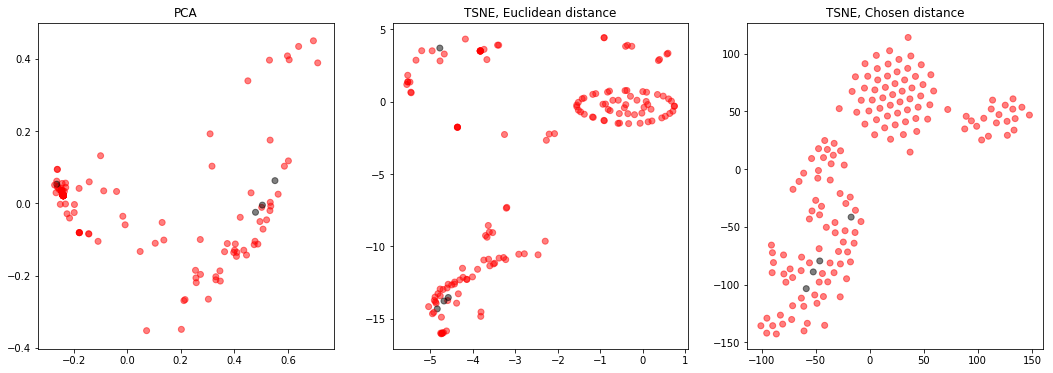

In [49]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=300)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=500)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

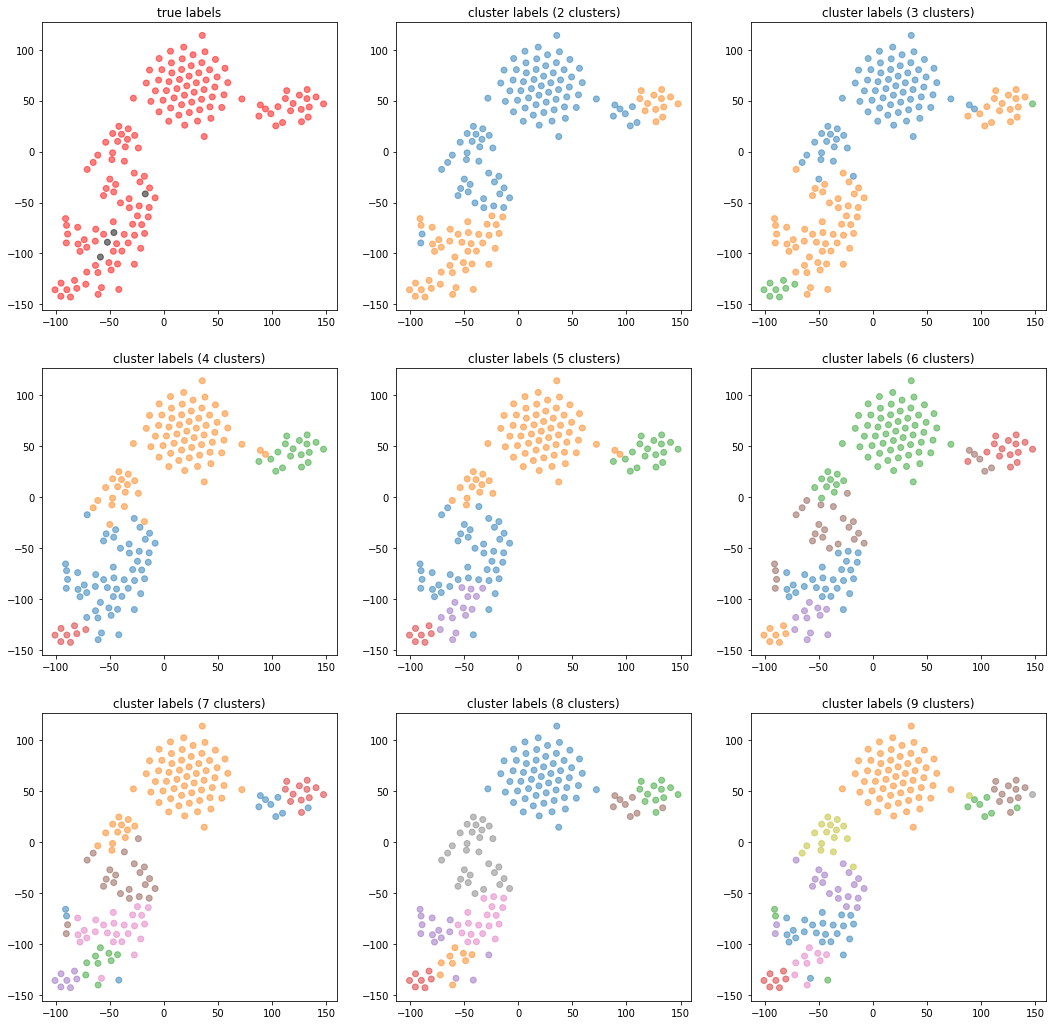

In [50]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42, learning_rate=500)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=500)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 18))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [51]:
n = 4

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

# centroids
print("centroids:")
display(centers)

0 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
0,b'[KRL2007b] 194',Be,b'1FGL J1636.4-4737c',b'snr ',0
2,b'UCAC2 5051621',Be,b' ',b'spp ',0
3,b'SSTGC 519103',Be,b'1FGL J1745.6-2900c',b'spp ',0
6,b'LS I +56 58',B,b' ',b' ',0
7,b'PG 1101+529',B,b' ',b' ',0
8,b'GALEX J175340.5-500741',B,b'1FGL J1754.0-5002 ',b'bcu ',0
11,b'EM* GGA 394',B,b' ',b'spp ',0
12,b'MAC 1-490',B,b' ',b'bcu ',0
13,b'LS IV -03 6',B,b'1FGL J1842.9-0359c',b' ',0
15,b'BD-14 5057',B,b' ',b' ',0


1 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
4,b'LIN 341',Be,b'1FGL J0101.3-7257 ',b'GAL ',0
5,b'LS VI -04 15',B,b' ',b' ',0
10,b'GSC 05698-00468',B,b' ',b'spp ',0
18,b'SDSS J085023.10+485826.3',B,b'1FGL J0849.9+4852 ',b'bll ',0
20,b'LS IV -14 72',B,b' ',b' ',0
22,b'SDSS J104238.64+240826.6',B,b'1FGL J1043.1+2404 ',b'fsrq ',0
29,b'DETWC Tr 16 J104445.3-593920',B,b'1FGL J1045.2-5942 ',b'BIN ',0
38,b'SDSS J232339.56-031507.7',B,b'1FGL J2323.5-0315 ',b'fsrq ',0
43,b'HD 295998',B,b' ',b' ',0
46,b'PG 0042+211',O,b'1FGL J0045.3+2127 ',b'bll ',0


2 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
9,b'HD 306182',B,b' ',b'spp ',0
14,b'Cl Trumpler 16 215',B,b'1FGL J1045.2-5942 ',b'BIN ',0
16,b'TYC 8958-1269-1',B,b' ',b'PSR ',0
26,b'TYC 158-2839-1',B,b' ',b'spp ',0
39,b'TYC 8958-3477-1',B,b' ',b'PSR ',0
41,b'HD 92406',B,b' ',b' ',0
44,b'TYC 9044-1653-1',B,b' ',b'bll ',0
61,b'HD 306179',B0Ve,b' ',b'spp ',0
64,b'HD 192039',B0Ve,b' ',b' ',0
67,b'CPD-59 2674',B0Ve,b' ',b' ',0


3 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
1,b'HD 328990',Be,b'1FGL J1651.5-4602c',b' ',0
35,b'GCIRS 1W',B,b' ',b' ',0
36,b'GCIRS 1W',B,b'1FGL J1745.6-2900c',b'spp ',0
48,b'CPD-58 2614',O,b' ',b' ',0
49,b'[MCD2010] 18',O,b'1FGL J1746.4-2849c',b'pwn ',0
53,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',0
79,b'2MASS J02254709+6206131',B0Ve,b' ',b' ',0
142,b'[KRL2007b] 332',B0Ve,b' ',b'PWN ',0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,s_FLUX_I,s_FLUX_G,s_FLUX_J,s_FLUX_H,s_FLUX_K,s_FLUX_u,s_FLUX_g,s_FLUX_r,s_FLUX_i,s_FLUX_z
0,0.062155,0.094131,0.123666,0.060159,0.118481,0.0,0.013190,0.001861,0.004229,0.000768,0.003469,0.006855,0.089909,0.161758,0.257131,4.152506e-06,0.000283,0.000603,0.001342,6.611475e-06
1,0.097676,0.267213,0.233158,0.124397,0.233814,0.0,0.008401,0.001176,0.002022,0.000023,0.000021,0.002388,0.008204,0.009832,0.011493,1.096872e-09,0.000006,0.000045,0.000132,6.982337e-10
2,0.015548,0.064380,0.079313,0.037910,0.076683,0.0,0.090122,0.033036,0.041062,0.019492,0.025303,0.046142,0.128022,0.151055,0.166636,0.000000e+00,0.005921,0.008865,0.010508,0.000000e+00
3,0.005392,0.042738,0.009522,0.022284,0.039645,0.0,0.020219,0.096725,0.008055,0.000013,0.000000,0.000021,0.000850,0.014738,0.739761,0.000000e+00,0.000005,0.000015,0.000018,0.000000e+00


* ### euclidean distance

In [23]:
# euclidean distance
from scipy.spatial.distance import euclidean
metric_function = "euclidean"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

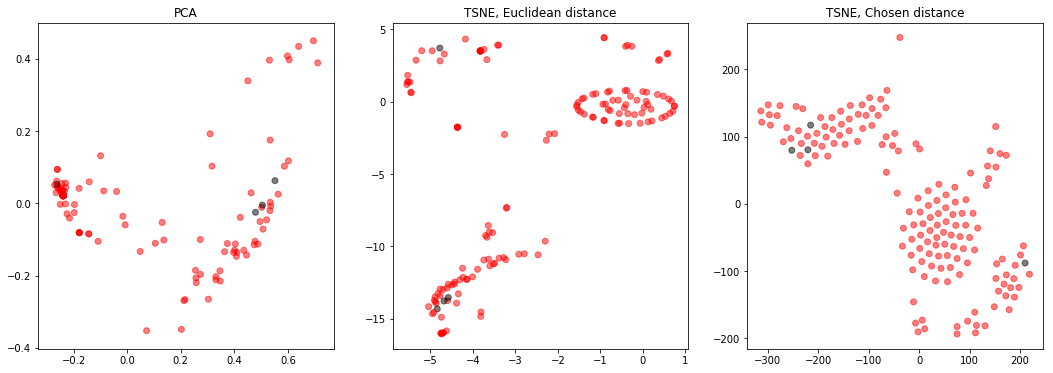

In [25]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=300, n_iter=1500)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=600)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

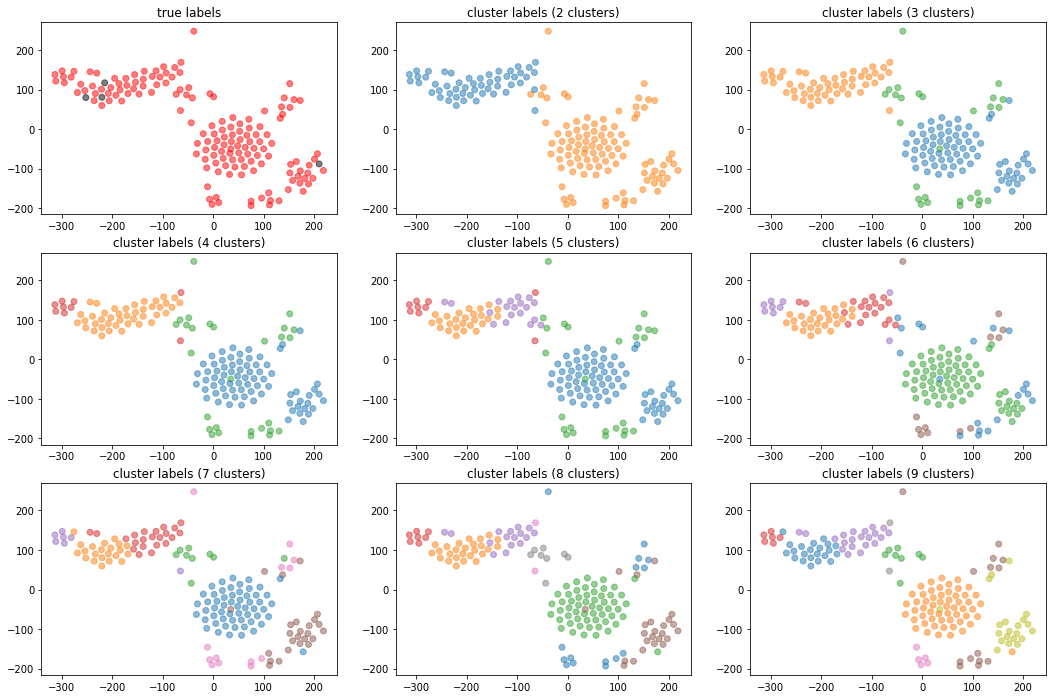

In [26]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=600)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 12))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [27]:
n = 6

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

# centroids
print("centroids:")
display(centers)
# plt.figure(figsize=(20, 10))
# sns.heatmap(centers, vmin=0, vmax=1)
# plt.show()

0 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
0,b'[KRL2007b] 194',Be,b'1FGL J1636.4-4737c',b'snr ',0
3,b'SSTGC 519103',Be,b'1FGL J1745.6-2900c',b'spp ',0
7,b'PG 1101+529',B,b' ',b' ',0
8,b'GALEX J175340.5-500741',B,b'1FGL J1754.0-5002 ',b'bcu ',0
14,b'Cl Trumpler 16 215',B,b'1FGL J1045.2-5942 ',b'BIN ',0
16,b'TYC 8958-1269-1',B,b' ',b'PSR ',0
24,b'LS III +50 6',B,b'1FGL J2046.0+4954 ',b'SNR ',0
26,b'TYC 158-2839-1',B,b' ',b'spp ',0
30,b'SDSS J020438.26+150820.5',B,b'1FGL J0204.5+1516 ',b'bcu ',0
34,b'SDSS J134029.74+441346.8',B,b'1FGL J1340.6+4406 ',b'bll ',0


1 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
6,b'LS I +56 58',B,b' ',b' ',0
11,b'EM* GGA 394',B,b' ',b'spp ',0
13,b'LS IV -03 6',B,b'1FGL J1842.9-0359c',b' ',0
15,b'BD-14 5057',B,b' ',b' ',0
17,b'EM* GGR 129',B,b' ',b' ',0
21,b'CPD-58 2608B',B,b' ',b' ',0
23,b'Hen 3-1611',B,b' ',b'spp ',0
25,b'LS III +45 57',B,b'1FGL J2111.3+4607 ',b'PSR ',0
33,b'LS IV -05 11',B,b' ',b'PWN ',0
42,b'LS III +60 19',B,b' ',b'spp ',0


2 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
4,b'LIN 341',Be,b'1FGL J0101.3-7257 ',b'GAL ',0
10,b'GSC 05698-00468',B,b' ',b'spp ',0
18,b'SDSS J085023.10+485826.3',B,b'1FGL J0849.9+4852 ',b'bll ',0
22,b'SDSS J104238.64+240826.6',B,b'1FGL J1043.1+2404 ',b'fsrq ',0
29,b'DETWC Tr 16 J104445.3-593920',B,b'1FGL J1045.2-5942 ',b'BIN ',0
47,b'LLNS 2720',O,b'1FGL J1045.2-5942 ',b'BIN ',0
54,b'[BKH2005] 16164nr3636',O,b' ',b' ',0
58,b'AzV 236',B0Ve,b'1FGL J0101.3-7257 ',b'GAL ',0
73,b'AzV 216',B0Ve,b'1FGL J0101.3-7257 ',b'GAL ',0
75,b'AzV 233',B0Ve,b'1FGL J0101.3-7257 ',b'GAL ',0


3 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
2,b'UCAC2 5051621',Be,b' ',b'spp ',0
5,b'LS VI -04 15',B,b' ',b' ',0
9,b'HD 306182',B,b' ',b'spp ',0
19,b'LS IV -14 70',B,b' ',b' ',0
31,b'LS II +38 34',B,b' ',b'bcu ',0
39,b'TYC 8958-3477-1',B,b' ',b'PSR ',0
41,b'HD 92406',B,b' ',b' ',0
43,b'HD 295998',B,b' ',b' ',0
61,b'HD 306179',B0Ve,b' ',b'spp ',0
64,b'HD 192039',B0Ve,b' ',b' ',0


4 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
1,b'HD 328990',Be,b'1FGL J1651.5-4602c',b' ',0
35,b'GCIRS 1W',B,b' ',b' ',0
36,b'GCIRS 1W',B,b'1FGL J1745.6-2900c',b'spp ',0
48,b'CPD-58 2614',O,b' ',b' ',0
49,b'[MCD2010] 18',O,b'1FGL J1746.4-2849c',b'pwn ',0
53,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',0
79,b'2MASS J02254709+6206131',B0Ve,b' ',b' ',0
90,b'HD 104705',B0Ve,b' ',b'psr ',0
142,b'[KRL2007b] 332',B0Ve,b' ',b'PWN ',0


5 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
12,b'MAC 1-490',B,b' ',b'bcu ',0
20,b'LS IV -14 72',B,b' ',b' ',0
27,b'EC 20443-3134',B,b' ',b' ',0
28,b'EC 19516-5652',B,b' ',b'bcu ',0
32,b'LGGS J004032.13+404522.5',B,b' ',b'bcu ',0
40,b'MAC 1-531',B,b' ',b'bcu ',0
50,b'[MCF2015] 22',O,b' ',b' ',0
74,b'MAC 1-159',B0Ve,b' ',b'bcu ',0
77,b'BBRW W3 (c)',B0Ve,b' ',b' ',0
78,b'[WBN72] W 3 IRS 2b',B0Ve,b' ',b' ',0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,s_FLUX_I,s_FLUX_G,s_FLUX_J,s_FLUX_H,s_FLUX_K,s_FLUX_u,s_FLUX_g,s_FLUX_r,s_FLUX_i,s_FLUX_z
0,0.047307,0.184481,0.288491,0.115724,0.247938,0.0,0.005419,0.010330,0.008759,4.458879e-03,4.800317e-03,7.561168e-03,0.016688,0.018751,0.039194,1.100611e-05,0.000025,0.000024,0.000021,1.752288e-05
1,0.002300,0.008817,0.006572,0.006019,0.010240,0.0,0.007147,0.003173,0.006890,1.251151e-03,6.910119e-03,1.025863e-02,0.168458,0.302370,0.456499,0.000000e+00,0.000537,0.001044,0.001513,0.000000e+00
2,0.103969,0.281377,0.243268,0.125626,0.244144,0.0,0.000069,0.000013,0.000030,2.568718e-05,4.119650e-06,3.952943e-05,0.000206,0.000680,0.000347,6.368409e-10,0.000007,0.000049,0.000145,5.313973e-11
3,0.005105,0.036119,0.046440,0.019625,0.044163,0.0,0.096594,0.025831,0.039812,1.383286e-02,1.920865e-02,4.577947e-02,0.150713,0.189403,0.243410,0.000000e+00,0.005610,0.008399,0.009955,0.000000e+00
4,0.004793,0.037995,0.008474,0.019810,0.035248,0.0,0.081374,0.086130,0.007589,7.913724e-04,0.000000e+00,9.446563e-03,0.010897,0.023942,0.669453,0.000000e+00,0.000063,0.000495,0.003500,0.000000e+00
5,0.226724,0.202979,0.174444,0.151075,0.209962,0.0,0.021238,0.000041,0.000022,4.243955e-08,1.657923e-07,1.587402e-08,0.000863,0.004964,0.007689,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00


* ### cosine distance

In [28]:
# cosine distance
# from scipy.spatial.distance import cosine
metric_function = "cosine"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

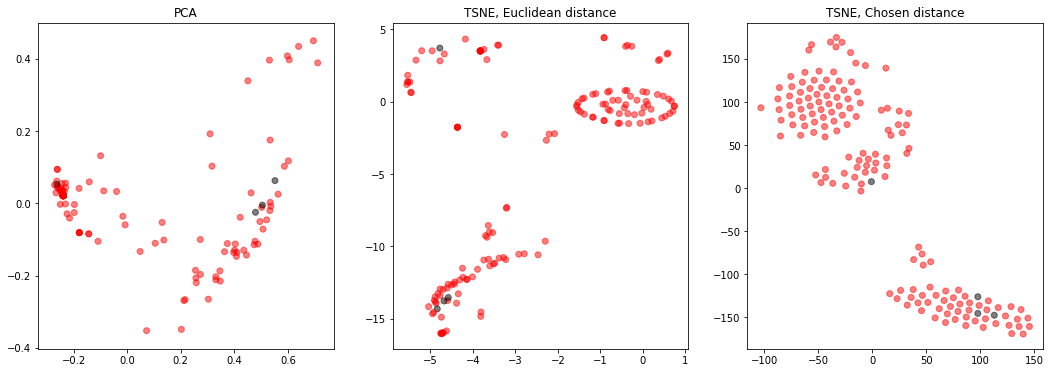

In [34]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=300, n_iter=1500)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=600)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

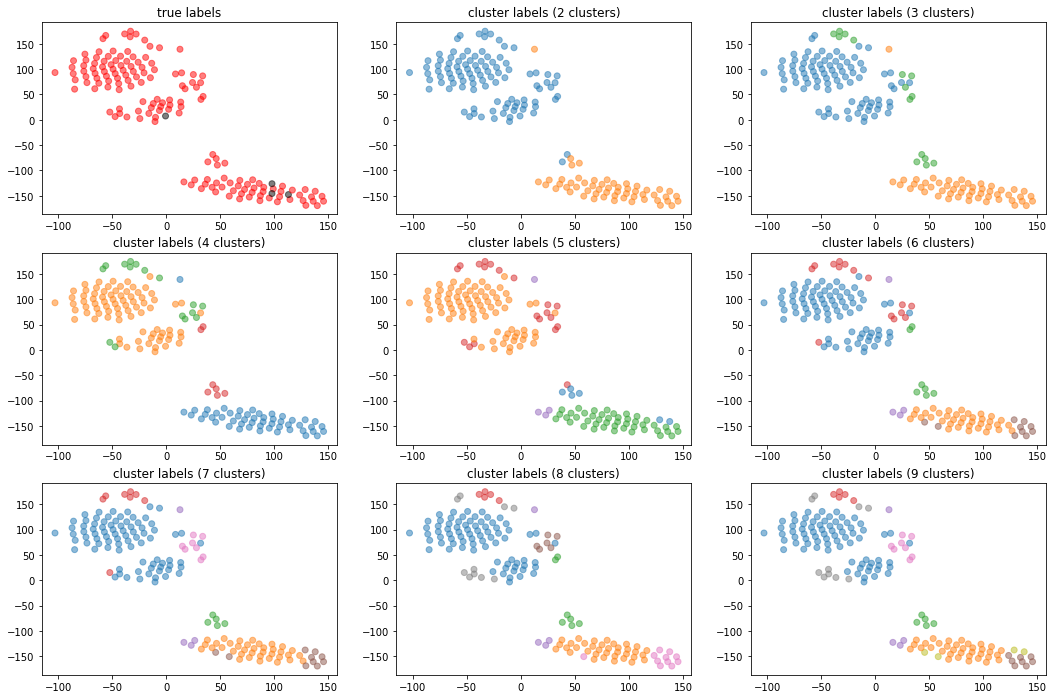

In [35]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=600)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 12))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [36]:
n = 4

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

# centroids
print("centroids:")
display(centers)
# plt.figure(figsize=(20, 10))
# sns.heatmap(centers, vmin=0, vmax=1)
# plt.show()

0 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
1,b'HD 328990',Be,b'1FGL J1651.5-4602c',b' ',0
2,b'UCAC2 5051621',Be,b' ',b'spp ',0
5,b'LS VI -04 15',B,b' ',b' ',0
6,b'LS I +56 58',B,b' ',b' ',0
11,b'EM* GGA 394',B,b' ',b'spp ',0
13,b'LS IV -03 6',B,b'1FGL J1842.9-0359c',b' ',0
15,b'BD-14 5057',B,b' ',b' ',0
17,b'EM* GGR 129',B,b' ',b' ',0
19,b'LS IV -14 70',B,b' ',b' ',0
21,b'CPD-58 2608B',B,b' ',b' ',0


1 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
0,b'[KRL2007b] 194',Be,b'1FGL J1636.4-4737c',b'snr ',0
3,b'SSTGC 519103',Be,b'1FGL J1745.6-2900c',b'spp ',0
4,b'LIN 341',Be,b'1FGL J0101.3-7257 ',b'GAL ',0
7,b'PG 1101+529',B,b' ',b' ',0
8,b'GALEX J175340.5-500741',B,b'1FGL J1754.0-5002 ',b'bcu ',0
10,b'GSC 05698-00468',B,b' ',b'spp ',0
18,b'SDSS J085023.10+485826.3',B,b'1FGL J0849.9+4852 ',b'bll ',0
22,b'SDSS J104238.64+240826.6',B,b'1FGL J1043.1+2404 ',b'fsrq ',0
24,b'LS III +50 6',B,b'1FGL J2046.0+4954 ',b'SNR ',0
29,b'DETWC Tr 16 J104445.3-593920',B,b'1FGL J1045.2-5942 ',b'BIN ',0


2 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
12,b'MAC 1-490',B,b' ',b'bcu ',0
20,b'LS IV -14 72',B,b' ',b' ',0
27,b'EC 20443-3134',B,b' ',b' ',0
28,b'EC 19516-5652',B,b' ',b'bcu ',0
32,b'LGGS J004032.13+404522.5',B,b' ',b'bcu ',0
34,b'SDSS J134029.74+441346.8',B,b'1FGL J1340.6+4406 ',b'bll ',0
40,b'MAC 1-531',B,b' ',b'bcu ',0
44,b'TYC 9044-1653-1',B,b' ',b'bll ',0
50,b'[MCF2015] 22',O,b' ',b' ',0
51,b'GCIRS 8',O,b' ',b' ',0


3 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
9,b'HD 306182',B,b' ',b'spp ',0
14,b'Cl Trumpler 16 215',B,b'1FGL J1045.2-5942 ',b'BIN ',0
16,b'TYC 8958-1269-1',B,b' ',b'PSR ',0
26,b'TYC 158-2839-1',B,b' ',b'spp ',0
39,b'TYC 8958-3477-1',B,b' ',b'PSR ',0
70,b'CPD-59 3179',B0Ve,b' ',b'spp ',0
83,b'UCAC4 146-087591',B0Ve,b'1FGL J1134.8-6055 ',b'PSR ',0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,s_FLUX_I,s_FLUX_G,s_FLUX_J,s_FLUX_H,s_FLUX_K,s_FLUX_u,s_FLUX_g,s_FLUX_r,s_FLUX_i,s_FLUX_z
0,0.003350,0.019503,0.013651,0.011365,0.021144,0.0,0.053439,0.025330,0.017836,0.004996,0.010095,0.021937,0.136692,0.219647,0.431395,0.000000e+00,1.835131e-03,3.319797e-03,4.464073e-03,0.000000e+00
1,0.093776,0.269945,0.257146,0.125793,0.250434,0.0,0.000280,0.000043,0.000252,0.000026,0.000020,0.000063,0.000206,0.000625,0.001197,2.717860e-06,1.184798e-05,4.770764e-05,1.286432e-04,4.326572e-06
2,0.197925,0.194872,0.197521,0.141785,0.205480,0.0,0.015928,0.006797,0.003822,0.002757,0.001821,0.003230,0.001483,0.004301,0.022277,1.219702e-09,1.368526e-09,9.252368e-10,6.702758e-10,5.575112e-10
3,0.015299,0.117105,0.156110,0.066553,0.156521,0.0,0.016938,0.021772,0.027169,0.013201,0.013613,0.028559,0.098306,0.119410,0.137770,0.000000e+00,3.931059e-03,3.122549e-03,4.618589e-03,0.000000e+00


* ### energy distance

In [37]:
# energy distance
metric_function = st.energy_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

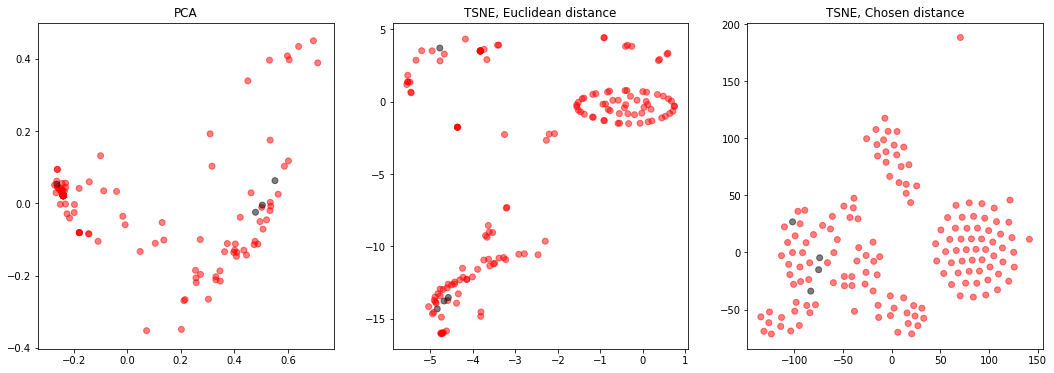

In [45]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=300, n_iter=1500)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=600)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

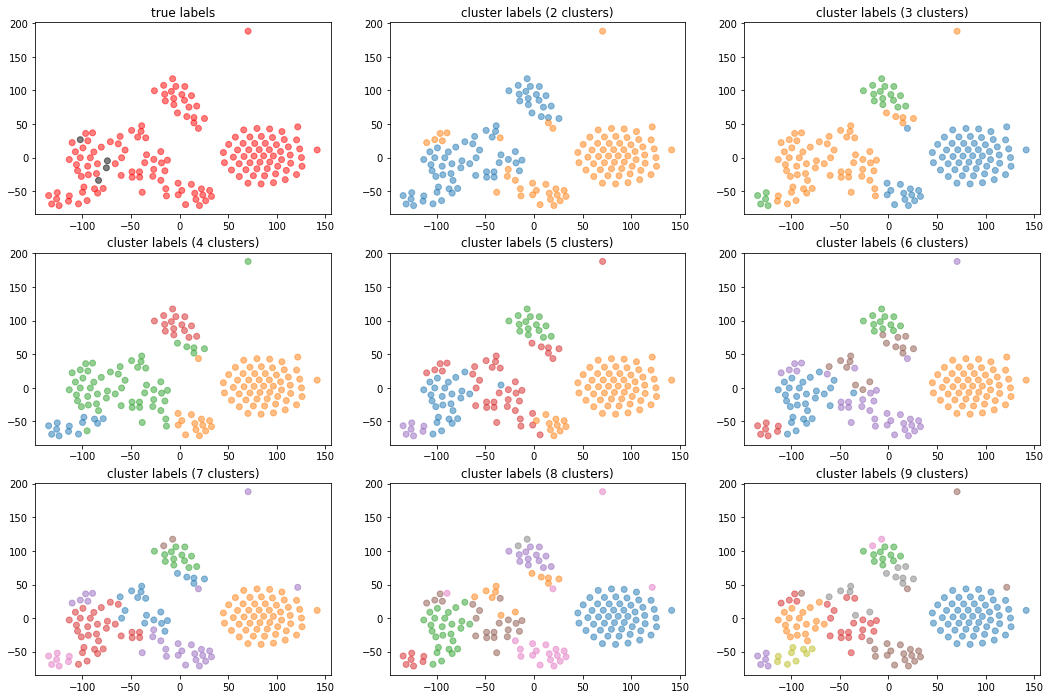

In [46]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=600)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 12))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [47]:
n = 4

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

# centroids
print("centroids:")
display(centers)
# plt.figure(figsize=(20, 10))
# sns.heatmap(centers, vmin=0, vmax=1)
# plt.show()

0 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
1,b'HD 328990',Be,b'1FGL J1651.5-4602c',b' ',0
35,b'GCIRS 1W',B,b' ',b' ',0
36,b'GCIRS 1W',B,b'1FGL J1745.6-2900c',b'spp ',0
48,b'CPD-58 2614',O,b' ',b' ',0
49,b'[MCD2010] 18',O,b'1FGL J1746.4-2849c',b'pwn ',0
53,b'[MCD2010] 13',O,b'1FGL J1746.4-2849c',b'pwn ',0
55,b'TYC 3156-998-1',O,b' ',b'SFR ',0
77,b'BBRW W3 (c)',B0Ve,b' ',b' ',0
78,b'[WBN72] W 3 IRS 2b',B0Ve,b' ',b' ',0
79,b'2MASS J02254709+6206131',B0Ve,b' ',b' ',0


1 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
4,b'LIN 341',Be,b'1FGL J0101.3-7257 ',b'GAL ',0
18,b'SDSS J085023.10+485826.3',B,b'1FGL J0849.9+4852 ',b'bll ',0
20,b'LS IV -14 72',B,b' ',b' ',0
22,b'SDSS J104238.64+240826.6',B,b'1FGL J1043.1+2404 ',b'fsrq ',0
29,b'DETWC Tr 16 J104445.3-593920',B,b'1FGL J1045.2-5942 ',b'BIN ',0
47,b'LLNS 2720',O,b'1FGL J1045.2-5942 ',b'BIN ',0
54,b'[BKH2005] 16164nr3636',O,b' ',b' ',0
58,b'AzV 236',B0Ve,b'1FGL J0101.3-7257 ',b'GAL ',0
73,b'AzV 216',B0Ve,b'1FGL J0101.3-7257 ',b'GAL ',0
75,b'AzV 233',B0Ve,b'1FGL J0101.3-7257 ',b'GAL ',0


2 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
0,b'[KRL2007b] 194',Be,b'1FGL J1636.4-4737c',b'snr ',0
2,b'UCAC2 5051621',Be,b' ',b'spp ',0
3,b'SSTGC 519103',Be,b'1FGL J1745.6-2900c',b'spp ',0
5,b'LS VI -04 15',B,b' ',b' ',0
6,b'LS I +56 58',B,b' ',b' ',0
7,b'PG 1101+529',B,b' ',b' ',0
8,b'GALEX J175340.5-500741',B,b'1FGL J1754.0-5002 ',b'bcu ',0
10,b'GSC 05698-00468',B,b' ',b'spp ',0
11,b'EM* GGA 394',B,b' ',b'spp ',0
12,b'MAC 1-490',B,b' ',b'bcu ',0


3 cluster


,s_MAIN_ID,s_class,gev_1FGL_Name,gev_CLASS1,marked
9,b'HD 306182',B,b' ',b'spp ',0
16,b'TYC 8958-1269-1',B,b' ',b'PSR ',0
26,b'TYC 158-2839-1',B,b' ',b'spp ',0
39,b'TYC 8958-3477-1',B,b' ',b'PSR ',0
41,b'HD 92406',B,b' ',b' ',0
44,b'TYC 9044-1653-1',B,b' ',b'bll ',0
61,b'HD 306179',B0Ve,b' ',b'spp ',0
67,b'CPD-59 2674',B0Ve,b' ',b' ',0
68,b'CPD-59 2596',B0Ve,b'1FGL J1045.2-5942 ',b'BIN ',0
70,b'CPD-59 3179',B0Ve,b' ',b'spp ',0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,s_FLUX_U,s_FLUX_B,s_FLUX_V,s_FLUX_R,s_FLUX_I,s_FLUX_G,s_FLUX_J,s_FLUX_H,s_FLUX_K,s_FLUX_u,s_FLUX_g,s_FLUX_r,s_FLUX_i,s_FLUX_z
0,0.003534,0.079526,0.006313,0.028101,0.110672,0.0,0.012442,0.059526,0.005013,0.000008,0.000000,0.000144,0.019792,0.080136,0.594768,0.000000e+00,3.354306e-06,9.453715e-06,1.085430e-05,0.000000e+00
1,0.103174,0.280677,0.241133,0.126837,0.243237,0.0,0.003675,0.000011,0.000008,0.000002,0.000004,0.000008,0.000206,0.000680,0.000347,6.368409e-10,4.287620e-10,1.674564e-10,8.467938e-11,5.313973e-11
2,0.062579,0.093578,0.134459,0.065750,0.110342,0.0,0.025117,0.004551,0.008406,0.001454,0.003270,0.011746,0.095640,0.152426,0.228398,3.795211e-06,2.662413e-04,6.091813e-04,1.398730e-03,6.042372e-06
3,0.016404,0.064653,0.083953,0.038178,0.074991,0.0,0.083292,0.034529,0.041870,0.020591,0.030066,0.046118,0.125416,0.148523,0.161061,0.000000e+00,7.105543e-03,1.063843e-02,1.261003e-02,0.000000e+00
